In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from skimage import io
%matplotlib inline

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))

In [3]:
def get_image(url):
    image = io.imread(url)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

In [4]:
def get_colors(image, number_of_colors=8, show_chart=True):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters=5)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        ax[0].pie(counts.values(), labels=hex_colors, colors=hex_colors, autopct='%1.1f%%')
        dominant_color = counts.most_common(1)[0][0]
        dom_hex = RGB2HEX(ordered_colors[dominant_color])
        ax[1].bar(dom_hex, height=0.05, width=0.005, color=dom_hex, tick_label='Dominant Color: '+str(dom_hex))
        ax[1].axes.yaxis.set_ticklabels([])
    return rgb_colors

In [5]:
image_url = 'https://github.com/Tabish1226/bleedAI/blob/main/3.jpg?raw=true'

[array([210.9229811 ,  82.03969072,  89.23818729]),
 array([35.52480582, 20.06217506, 46.02741795]),
 array([145.94926466,  50.19641486,  77.72488335]),
 array([10.08246903,  5.18996431,  7.52613899]),
 array([81.45579036, 32.96603395, 64.67338818])]

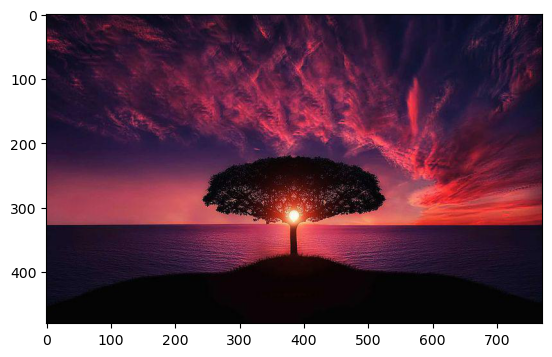

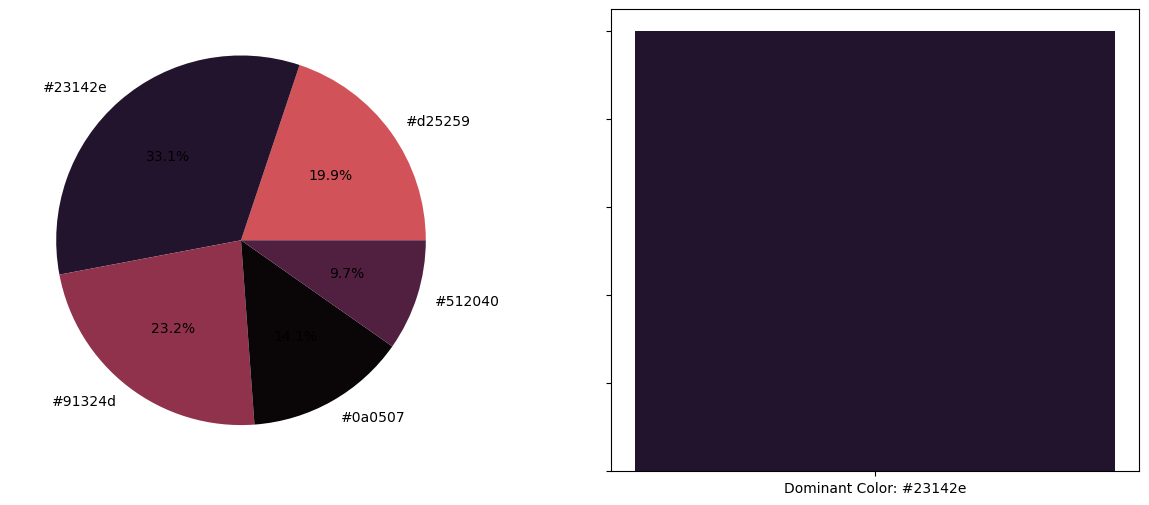

In [6]:
get_colors(get_image('1.jpg'), 8, True)

[array([117.26083815, 119.7267341 ,  44.45214957]),
 array([214.30190107, 196.11387496, 130.39411709]),
 array([70.25037434, 73.50607414, 28.81965079]),
 array([175.3783856 , 179.4156939 ,  39.45414664]),
 array([27.39047458, 27.81396724, 10.99180882])]

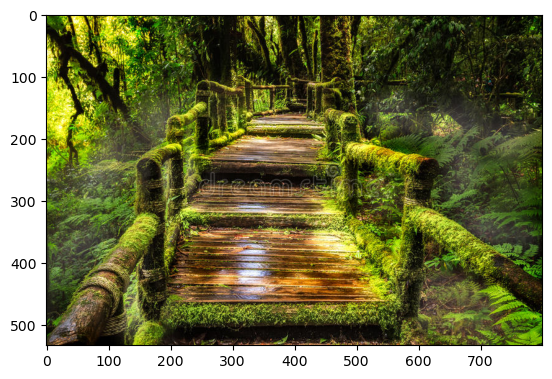

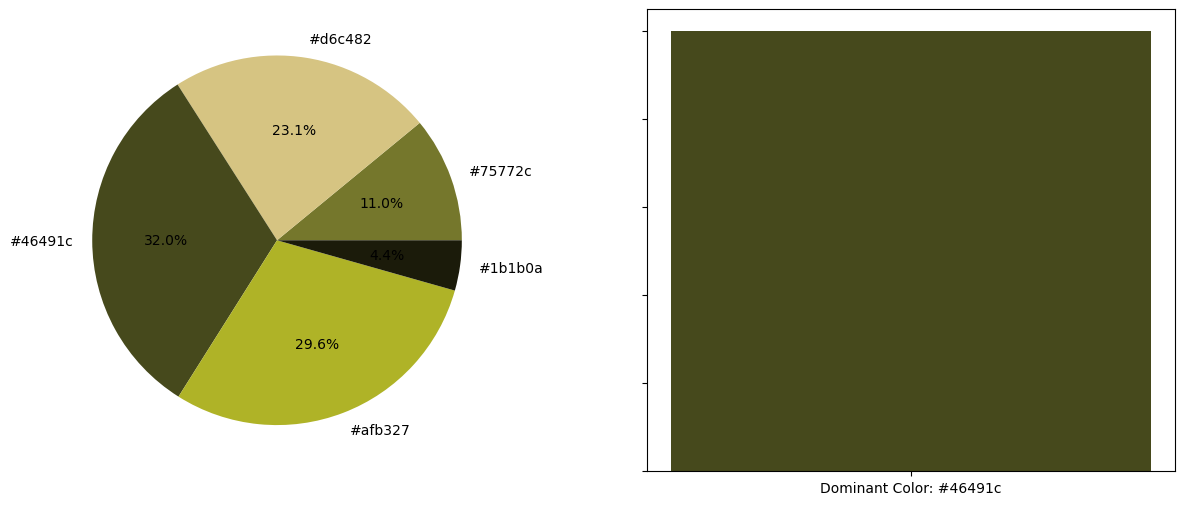

In [7]:
get_colors(get_image('2.jpg'), 8, True)

In [8]:
get_colors(fetch_image('3.jpg'), 8, True)

NameError: name 'fetch_image' is not defined

In [ ]:
get_colors(get_image('4.jpg'), 8, True)